In [51]:
import math
import numpy as np
from hilbertcurve.hilbertcurve import HilbertCurve

In [89]:
def SFCMap(order: int, dimension:int, distance:float):
    """
    SFCMap:[0, 1]→(0, 1)^2     [0,1]で正規化された距離から二次元座標を求める
    """
    hilbert_curve = HilbertCurve(order, dimension)
#     print("曲線の距離は{}\n横の長さは{}".format(hilbert_curve.max_h, hilbert_curve.max_x))
    
    distance = distance * hilbert_curve.max_h
    start_distance = math.floor(distance)
    t = distance - start_distance
#     print("始まりからの距離は{}、".format(distance))
    
    start_vec = np.array(hilbert_curve.coordinates_from_distance(start_distance))
    end_vec = np.array(hilbert_curve.coordinates_from_distance(start_distance + 1))
    dest_vec = (1 - t) * start_vec + t * end_vec
    
#     print("{}番目のインデックスは{}".format(start_distance, start_vec))
#     print("{}番目のインデックスは{}".format(start_distance + 1, end_vec))
#     print("目的のインデックスは{}".format(dest_vec))
    
    d = 0.5 / (hilbert_curve.max_x + 1)
    
    return d * (1 + 2 * dest_vec)



/Users/sakamoto/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


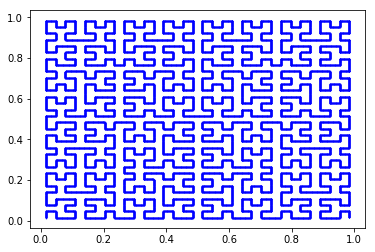

In [111]:
from matplotlib import pyplot
 
order = 5
N = 32000
x, y = [], []
for i in range(N):
    ans = list(SFCMap(order, 2, i / N))
    x.append(ans[0])
    y.append(ans[1])
 
# 点をプロットする
pyplot.scatter(x, y,   c='b', s=0.5)
 
# 凡例を表示する
pyplot.legend()
 
# グラフのタイトルを設定する
# pyplot.title("test_datas")
 
# 表示する
pyplot.show()